Arrests

Normally neiborhoods with crimes are not boring at all. Though crime does not sounds good, but it is not 'boring'.

How to measure the amount of crimes? The number of arrests.

In [12]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
data = pd.read_csv("Arrests.csv")

data.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


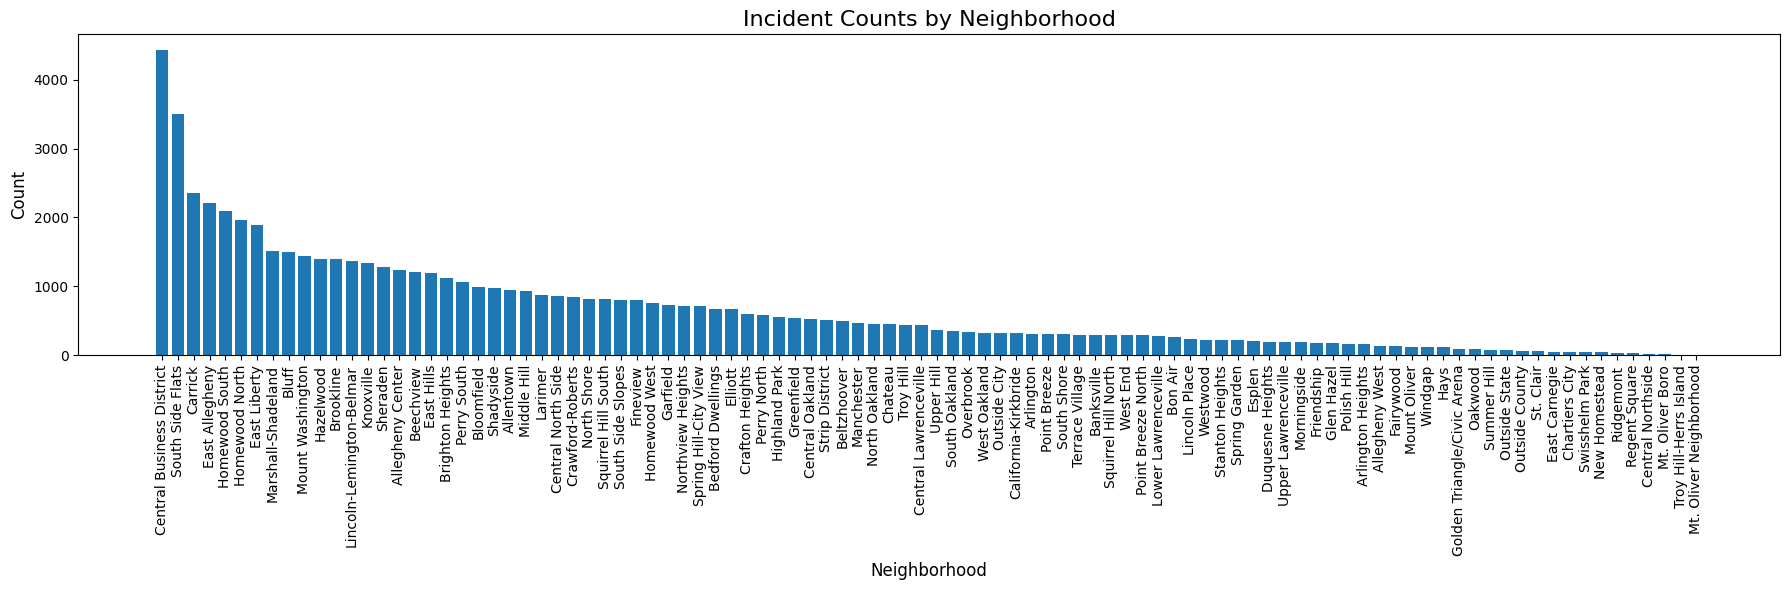

In [14]:
neighborhood_counts = data['INCIDENTNEIGHBORHOOD'].value_counts()
neighborhood_df = neighborhood_counts.reset_index()
neighborhood_df.columns = ['Neighborhood', 'Count']
plt.figure(figsize=(18, 6))
plt.bar(neighborhood_df['Neighborhood'], neighborhood_df['Count'])
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Incident Counts by Neighborhood', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Top 10 Neiborhoods with least arrests
               Neighborhood  Count  Range
97  Mt. Oliver Neighborhood      2  0-100
96   Troy Hill-Herrs Island      6  0-100
95          Mt. Oliver Boro     18  0-100
94        Central Northside     23  0-100
92                Ridgemont     37  0-100
93            Regent Square     37  0-100
91            New Homestead     39  0-100
90           Swisshelm Park     43  0-100
89           Chartiers City     46  0-100
88            East Carnegie     48  0-100


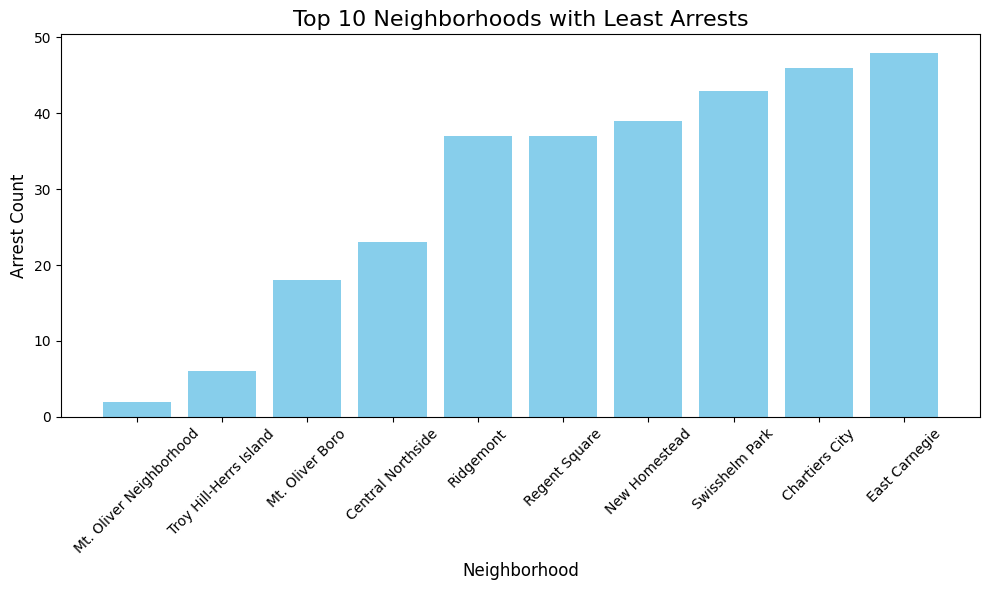

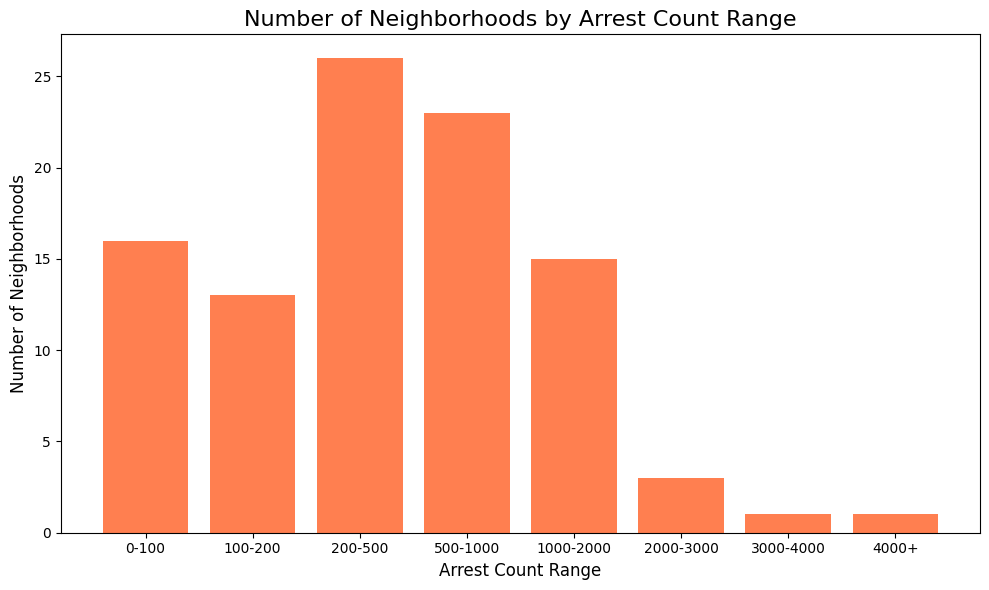

In [10]:
least_arrests = neighborhood_df.sort_values(by='Count').head(10)
print("Top 10 Neiborhoods with least arrests")
print(least_arrests)

plt.figure(figsize=(10, 6))
plt.bar(least_arrests['Neighborhood'], least_arrests['Count'], color='skyblue')
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Arrest Count', fontsize=12)
plt.title('Top 10 Neighborhoods with Least Arrests', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

bins = [0, 100, 200, 500, 1000, 2000, 3000, 4000, neighborhood_df['Count'].max()]
labels = ['0-100', '100-200', '200-500', '500-1000', '1000-2000', '2000-3000', '3000-4000', '4000+']

neighborhood_df['Range'] = pd.cut(neighborhood_df['Count'], bins=bins, labels=labels, include_lowest=True)

range_counts = neighborhood_df['Range'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(range_counts.index, range_counts.values, color='coral')
plt.xlabel('Arrest Count Range', fontsize=12)
plt.ylabel('Number of Neighborhoods', fontsize=12)
plt.title('Number of Neighborhoods by Arrest Count Range', fontsize=16)
plt.tight_layout()
plt.show()